In [42]:
#importing all necessary modules
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

In [43]:
#uploading train file
from google.colab import files
uploaded = files.upload()
train_file = next(iter(uploaded))

Saving final_train_file.csv to final_train_file.csv


In [45]:
#importing test file
from google.colab import files
uploaded = files.upload()
test_file = next(iter(uploaded))

Saving final_test_file.csv to final_test_file.csv


In [69]:
# Turning the csv files to dataframes
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [70]:
model_train_data = train_data.drop(columns=['Star_ID'])
model_test_data = test_data.drop(columns=['Star_ID'])

In [72]:
y_train = model_train_data['Exoplanet_Actual']
X_train = model_train_data.drop(columns=['Exoplanet_Actual'])
X_test = model_test_data.iloc[:,:]
X_train.shape, X_test.shape

((295, 68), (144, 68))

In [52]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train.shape, X_test.shape

((320, 68), (144, 68))

Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

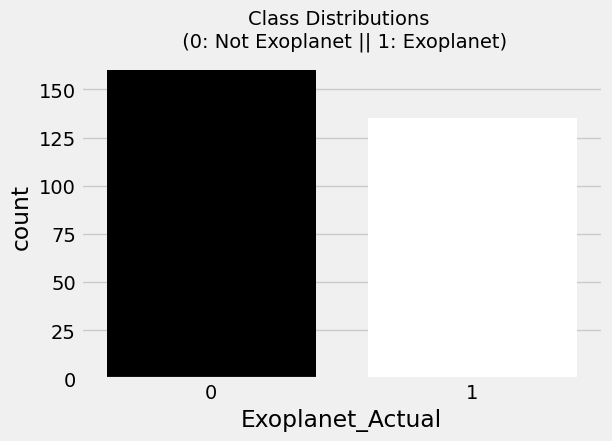

In [53]:
#show difference in number of data points in train file
plt.figure(figsize=(6,4))
colors = ["0", "1"]
sns.countplot(x='Exoplanet_Actual', data=train_data, palette=colors) # Changed: Explicitly specify 'x'
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
epochs = 50
batch_size = 16
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9692 - loss: 0.1329 - val_accuracy: 0.8281 - val_loss: 0.3951
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9267 - loss: 0.1937 - val_accuracy: 0.8594 - val_loss: 0.4244
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9095 - loss: 0.2624 - val_accuracy: 0.8594 - val_loss: 0.3542
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8841 - loss: 0.3455 - val_accuracy: 0.8281 - val_loss: 0.3005
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8888 - loss: 0.2268 - val_accuracy: 0.7969 - val_loss: 0.5017
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9398 - loss: 0.1494 - val_accuracy: 0.8125 - val_loss: 0.3770
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9319 - loss: 0.1563 - val_accuracy: 0.8125 - val_loss: 0.4375
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9666 - loss: 0.1165 - val_accuracy: 0.8438 - val_

In [75]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9648
Final Validation Accuracy: 0.8281


In [76]:
# Evaluate the model
predictions = model.predict(X_test)

predictions = (predictions.flatten() > 0.5).astype(int)  # Convert probabilities to binary labels

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


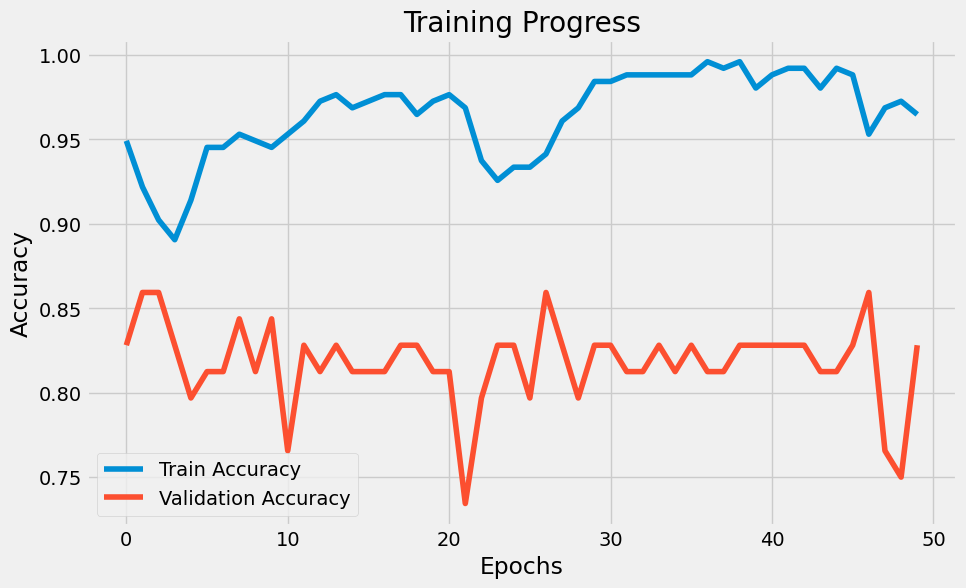

In [77]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Progress')
plt.show()

In [73]:
star_ids = test_data['Star_ID']

In [74]:
output = pd.DataFrame({'Star_ID': star_ids, 'Prediction': predictions})
output.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv with corresponding Star_ID")

Predictions saved to predictions.csv with corresponding Star_ID
